In [ ]:
from matplotlib import pyplot as plt
from crypy_examples.tripleQ_dwn import q3_DWN
from crypy_examples.clr_hexagon import gen_chex

import crypy as cp
import numpy as np

In [19]:
from crypy_examples.atom_network import color_Se_HA,color_Ta_HA
color_Se_HA = np.array(color_Se_HA)/255
color_Ta_HA = np.array(color_Ta_HA)/255

In [29]:
def draw_circle(X, Y, radius, linewidth, color):
    """
    matplotlib.pyplot을 사용하여 원을 그리는 함수
    
    :param X: 원점의 X 좌표
    :param Y: 원점의 Y 좌표
    :param radius: 원의 반지름
    :param linewidth: 선의 두께
    :param color: 선의 색상
    """
    # 0부터 2*pi까지 200개의 각도를 생성하여 부드러운 원 구현
    theta = np.linspace(0, 2 * np.pi, 200)
    
    # 원의 매개변수 방정식을 사용하여 x, y 좌표 계산
    x = X + radius * np.cos(theta)
    y = Y + radius * np.sin(theta)
    
    # matplotlib을 사용하여 원 그래프 출력
    plt.plot(x, y, linewidth=linewidth, color=color)

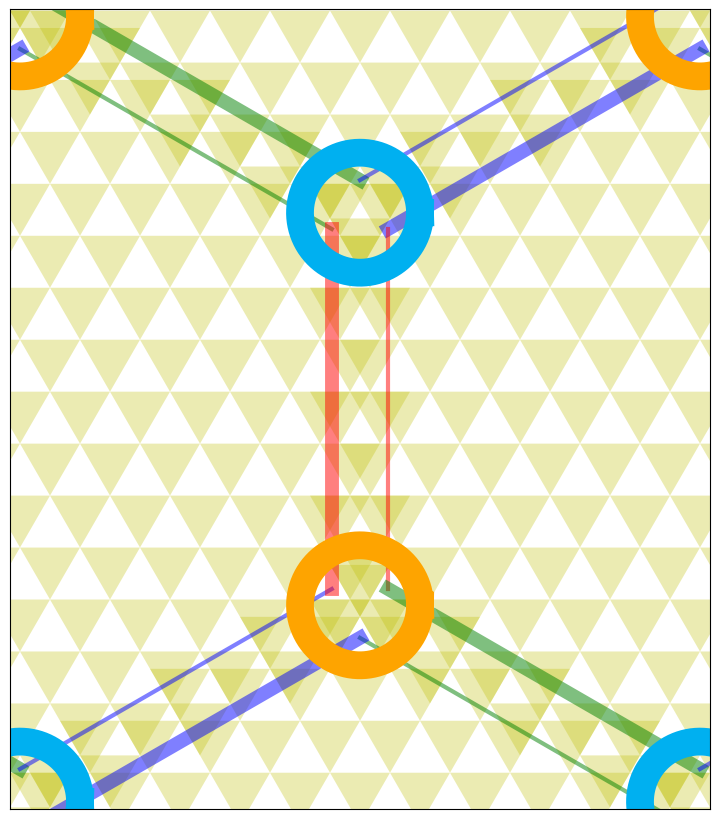

In [37]:
dw_cntr_index = (1/2,0) #center of frame
w_win = 35 # w of frame
h_win = 40 # h of frame
n_dom =6 # domain size
domain_range =  ((-1,1),(-1,1)) 
cry, cry_supsup = q3_DWN(n_dom) # generate crystal

pv_supsup = cry_supsup._lattice.primitive_vector
def get_xlimylim(cntr_index):
    cntr = pv_supsup.cal_xy_from_ij(cntr_index)
    cntr =cntr.flatten()
    xlim = (cntr[0]-w_win/2,cntr[0]+w_win/2)
    ylim = (cntr[1]-h_win/2,cntr[1]+h_win/2)
    return (xlim,ylim)
xlim,ylim = get_xlimylim(dw_cntr_index)
cry._lattice.generate_points_by_xylim(xlim,ylim)



# gen = lambda x,y: cp.Collection.Generator.gen_hexagon(x=x,y=y,
#     c = 'none',edgecolor='k',r = n_dom*3,phi=np.pi/2)
gen_dw = lambda x,y: gen_chex(
    x=x,y=y,R=n_dom*3,c_ord=['g','b','r'],thickness=[3,10],
    alpha=0.5)
cry_supsup._basis.add_artist(gen_dw,(0,0),label='crop hexagon')

gen_circle_Ta = lambda x, y:draw_circle(x, y, 3, 20, color_Ta_HA)
gen_circle_Se = lambda x, y:draw_circle(x, y, 3, 20, color_Se_HA)
# gen_ver_Ta = lambda x,y: cp.Collection.Generator.gen_regular_polygon(40,x,y,r=3,c=color_Ta_HA)
# gen_ver_Se = lambda x,y: cp.Collection.Generator.gen_regular_polygon(40,x,y,r=3,c=color_Se_HA)
cry_supsup._basis.add_artist(gen_circle_Ta,(2/3,1/3),label='crop hexagon')
cry_supsup._basis.add_artist(gen_circle_Se,(1/3,-1/3),label='crop hexagon')
cry_supsup._lattice.generate_points_by_range(*domain_range)

# cry.plot_crystal()
# breakpoint()
fig,ax = cry_supsup.plot_crystal()

ax.set_xlim(xlim)
ax.set_ylim(ylim)

fig.set_size_inches(w_win/5,h_win/5) 
ax.set_position([0,0,1,1])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('D04_vortex.svg')
# fig.savefig("assets/vortices.png",dpi=150,bbox_inches='tight',pad_inches=0)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# # breakpoint()
# plt.show()

In [36]:
ax.set_xlim([0,1])
plt.show()